In [2]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cmocean as cm
from salishsea_tools import viz_tools

In [3]:
gridT = xr.open_dataset('/data/dlatorne/MEOPAR/results/sss150/25feb23-precip-runoffs/sss150_1h_20230225_20230225_grid_T.nc')
gridT_norunoff = xr.open_dataset('/data/cstang/MEOPAR/results/sss150/25feb23_norunoff/sss150_1h_20230225_20230225_grid_T.nc')
sss150_rivers = xr.open_dataset('/results/forcing/rivers/sss150/R_sss150_Dailies_y2023m02d25.nc')
sss150_rivers26Feb = xr.open_dataset('/results/forcing/rivers/sss150/R_sss150_Dailies_y2023m02d26.nc')
ssc_rivers = xr.open_dataset('/results/forcing/rivers/R202108Dailies_y2023m02d25.nc')
ssc_rivers26Feb = xr.open_dataset('/results/forcing/rivers/R202108Dailies_y2023m02d26.nc')
feb25_GridT = xr.open_dataset('/data/dlatorne/MEOPAR/results/sss150/25feb23/sss150_1h_20230225_20230225_grid_T.nc')

In [5]:
feb25_GridT

<xarray.Dataset>
Dimensions:               (y: 826, x: 710, nvertex: 4, deptht: 39,
                           axis_nbounds: 2, time_counter: 24)
Coordinates:
    nav_lat               (y, x) float32 ...
    nav_lon               (y, x) float32 ...
  * deptht                (deptht) float32 0.5 1.5 2.5 3.5 ... 360.7 387.6 414.5
    time_centered         (time_counter) datetime64[ns] ...
  * time_counter          (time_counter) datetime64[ns] 2023-02-25T00:30:00 ....
Dimensions without coordinates: y, x, nvertex, axis_nbounds
Data variables:
    bounds_nav_lon        (y, x, nvertex) float32 ...
    bounds_nav_lat        (y, x, nvertex) float32 ...
    area                  (y, x) float32 ...
    deptht_bounds         (deptht, axis_nbounds) float32 ...
    time_centered_bounds  (time_counter, axis_nbounds) datetime64[ns] ...
    time_counter_bounds   (time_counter, axis_nbounds) datetime64[ns] ...
    sossheig              (time_counter, y, x) float32 ...
    votemper              (time_counter, deptht, y, x) float32 ...
    vosaline              (time_counter, deptht, y, x) float32 ...
    sigma_theta           (time_counter, deptht, y, x) float32 ...
    e3t                   (time_counter, deptht, y, x) float32 ...
Attributes:
    name:         sss150_1h_20230225_20230225_grid_T
    description:  physics tracers and VVL layer thicknesses
    title:        physics tracers and VVL layer thicknesses
    Conventions:  CF-1.6
    timeStamp:    2024-Nov-22 20:01:03 GMT
    uuid:         607caa85-95c2-4821-9b82-fa32447486f4

In [6]:
# Import mesh data
mesh = xr.open_dataset('/ocean/mdunphy/SSS150/grid/mesh_mask_southsalishsea150_update202108210102AUM1.nc')
tmask = 1 - mesh.tmask[0]
umask = 1 - mesh.umask[0]
vmask = 1 - mesh.vmask[0]

sss_GridT = xr.open_dataset('/data/dlatorne/MEOPAR/results/sss150/25feb23/sss150_1h_20230225_20230225_grid_T.nc')
ssc_gridT = xr.open_dataset('/results2/SalishSea/nowcast-green.202111/25feb23/SalishSea_1h_20230225_20230225_grid_T.nc')
mesh_ssc = xr.open_dataset('/ocean/cstang/MOAD/analysis-camryn/OAE/sss150/mesh_mask201702MD.nc')

In [7]:
np.where(gridT.precip>0)

(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))

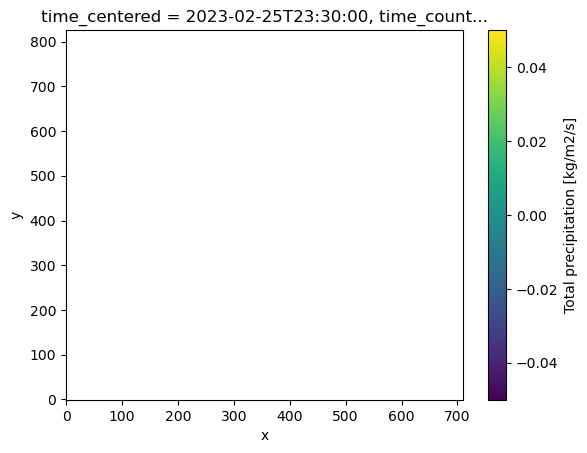

In [9]:
gridT.precip[23].plot()

### Check precip (from grib files)

In [16]:
precip_26feb23 = xr.open_dataset('/results/forcing/atmospheric/continental2.5/GRIB/20230226/00/001/20230226T00Z_MSC_HRDPS_PRATE_Sfc_RLatLon0.0225_PT001H.grib2', engine="cfgrib")
precip_25feb23 = xr.open_dataset('/results/forcing/atmospheric/continental2.5/GRIB/20230225/00/001/20230225T00Z_MSC_HRDPS_PRATE_Sfc_RLatLon0.0225_PT001H.grib2', engine="cfgrib")

In [23]:
precip_25feb23

<xarray.Dataset>
Dimensions:     (y: 1290, x: 2540)
Coordinates:
    time        datetime64[ns] ...
    step        timedelta64[ns] ...
    surface     float64 ...
    latitude    (y, x) float64 39.63 39.63 39.64 39.64 ... 47.91 47.89 47.88
    longitude   (y, x) float64 -133.6 -133.6 -133.6 ... -40.75 -40.73 -40.71
    valid_time  datetime64[ns] ...
Dimensions without coordinates: y, x
Data variables:
    prate       (y, x) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             cwao
    GRIB_centreDescription:  Canadian Meteorological Service - Montreal
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             Canadian Meteorological Service - Montreal
    history:                 2025-01-17T13:34 GRIB to CDM+CF via cfgrib-0.9.1...

In [17]:
Precip25feb23_short = precip_25feb23.where((precip_25feb23.latitude >= 48.93826) & (precip_25feb23.latitude <= 49.73697) & (precip_25feb23.longitude <= -122.230095) & (precip_25feb23.longitude >= -123.5816), drop=True)
Precip26feb23_short = precip_26feb23.where((precip_26feb23.latitude >= 48.93826) & (precip_26feb23.latitude <= 49.73697) & (precip_26feb23.longitude <= -122.230095) & (precip_26feb23.longitude >= -123.5816), drop=True)

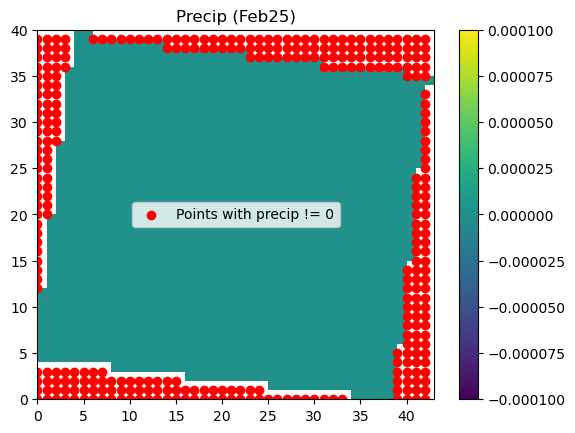

In [28]:
YY,XX = np.where(Precip25feb23_short.prate !=0)
XX

fig,ax = plt.subplots()

pc = ax.pcolormesh(Precip25feb23_short.prate)
pc.set_clim(-0.0001, 0.0001)
cb = fig.colorbar(pc)

for ii in range(len(XX)):
    plt.scatter(XX[ii],YY[ii],color='r')
    
plt.title('Precip (Feb25)')
plt.legend(['Points with precip != 0'])

Text(0.5, 1.0, ' Precip (Feb26)')

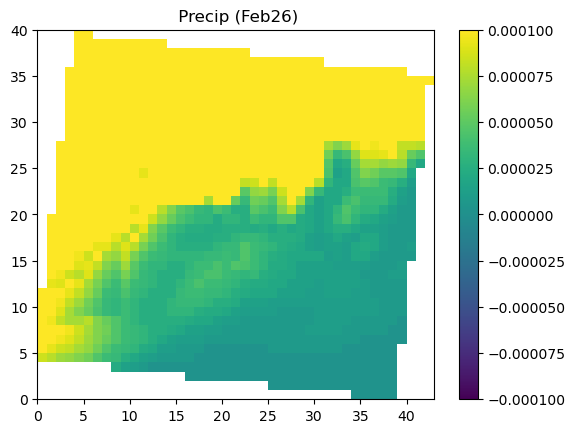

In [25]:
YY,XX = np.where(Precip26feb23_short.prate !=0)

fig,ax = plt.subplots()

pc = ax.pcolormesh(Precip26feb23_short.prate)
pc.set_clim(-0.0001, 0.0001)
cb = fig.colorbar(pc)

# for ii in range(len(XX)):
#     plt.scatter(XX[ii],YY[ii],color='r')
    
plt.title(' Precip (Feb26)')

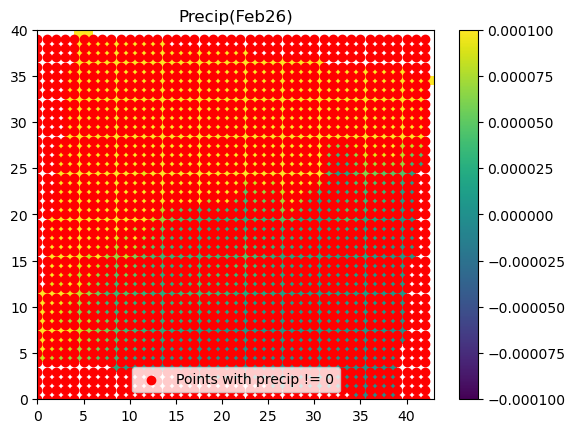

In [29]:
YY,XX = np.where(Precip26feb23_short.prate !=0)

fig,ax = plt.subplots()

pc = ax.pcolormesh(Precip26feb23_short.prate)
pc.set_clim(-0.0001, 0.0001)
cb = fig.colorbar(pc)

for ii in range(len(XX)):
    plt.scatter(XX[ii],YY[ii],color='r')
    
plt.title('Precip(Feb26)')
plt.legend(['Points with precip != 0'])